## Are Citizens of Asian Countries Happier Because of GDP, Generosity, or Dystopian Resilience?

Author: Munna R. Shainy [[Find me on LinkedIn]](https://www.linkedin.com/in/munna-rs)
Year: 2025

This project uses the World Happiness Report 2024 dataset available [here](https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated) to see what really drives happiness across different Asian countries. 

Using Python for data cleaning, visualization, and machine learning, I compared models — Linear Regression, Random Forest, and XGBoost — to identify which factors best predict a country's overall happiness score.

The analysis focuses on three key predictors:
- Log GDP per capita: Reflecting economic prosperity and material well-being.
- Generosity: Capturing social trust and altruistic behavior, independent of income.
- Dystopia + residual: Combines the Dystopia score (an imaginary country with the world’s least-happy people, used as a benchmark) and the unexplained residual for each country. This ensures the score is always positive, serving as a baseline that guarantees no nation ranks below the hypothetical Dystopia.


#### Key findings
The analysis revealed that Log GDP per capita was the strongest predictor of happiness, followed by Dystopia + residual, and then Generosity. This suggests that while economic strength plays a major role, underlying resilience and social goodwill also contribute meaningfully to happiness.


In [208]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

import pandas as pd

In [209]:

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="viridis", font_scale=1.1) #setting up a colour palette here

In [210]:
# Step 2: Load dataset

import os

file_path = os.path.join(path, "world-happiness-report-2024.csv")  # change name if later updates happen
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
df.head(5)

# here Ladder score is the happiness score for each country, based on responses to the Cantril Ladder question.

Dataset shape: (143, 12)


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


## Main Question: "Does High GDP in Asian regions relate to happiness?"

In [211]:
#Choosing only Asian countries by country_or_region col

# Filter rows where 'Regional indicator' contains 'Asia' (case-insensitive)
df = df[df['Regional indicator'].str.contains('Asia', case=False, na=False)]

print(df.shape)
df.head(12)

(21, 12)


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
29,Singapore,Southeast Asia,6.523,6.605,6.440,2.118,1.361,0.769,0.743,0.168,0.575,0.788
30,Taiwan Province of China,East Asia,6.503,6.597,6.410,1.842,1.346,0.650,0.649,0.068,0.202,1.747
50,Japan,East Asia,6.060,6.144,5.976,1.786,1.354,0.785,0.632,0.023,0.219,1.261
51,South Korea,East Asia,6.058,6.148,5.968,1.815,1.178,0.770,0.555,0.126,0.158,1.456
52,Philippines,Southeast Asia,6.048,6.166,5.929,1.232,1.146,0.441,0.826,0.099,0.136,2.167
53,Vietnam,Southeast Asia,6.043,6.138,5.948,1.331,1.267,0.539,0.843,0.094,0.160,1.810
57,Thailand,Southeast Asia,5.976,6.094,5.858,1.484,1.347,0.620,0.756,0.283,0.024,1.463
58,Malaysia,Southeast Asia,5.975,6.078,5.872,1.646,1.143,0.540,0.829,0.226,0.119,1.473
59,China,East Asia,5.973,6.061,5.885,1.497,1.239,0.629,0.704,0.132,0.164,1.608
76,Mongolia,East Asia,5.696,5.783,5.610,1.353,1.511,0.400,0.501,0.237,0.055,1.640


#### Plotting the countries and their happiness score

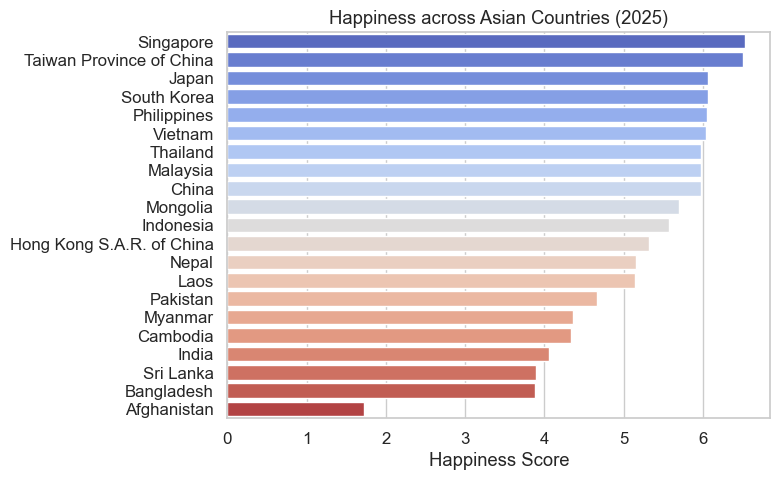

In [212]:
plt.figure(figsize=(8,5))
sns.barplot(y='Country name', x='Ladder score', data=df, palette='coolwarm')
plt.title("Happiness across Asian Countries (2025)")
plt.xlabel("Happiness Score")
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Plotting the corr matrix of all numberical columns available for a quick skim-through

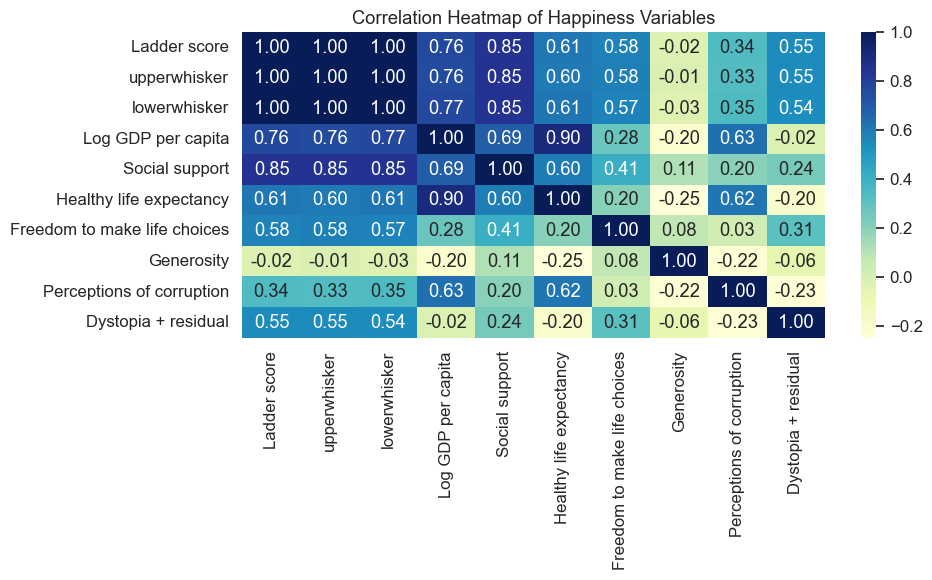

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# --- Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap of Happiness Variables")
plt.tight_layout()
plt.show()


##### Based on the plot, Log GDP per capita and Social support have the highest corr with happiness score. But there is a chance of higher multicollinearity. 
Considering the following variables: 
- Distopia + residual
- Generosity
- Log GDP per capita

#### Plotting Pairwise Relationships Among Key Happiness Factors

Here social support is defined as the national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.

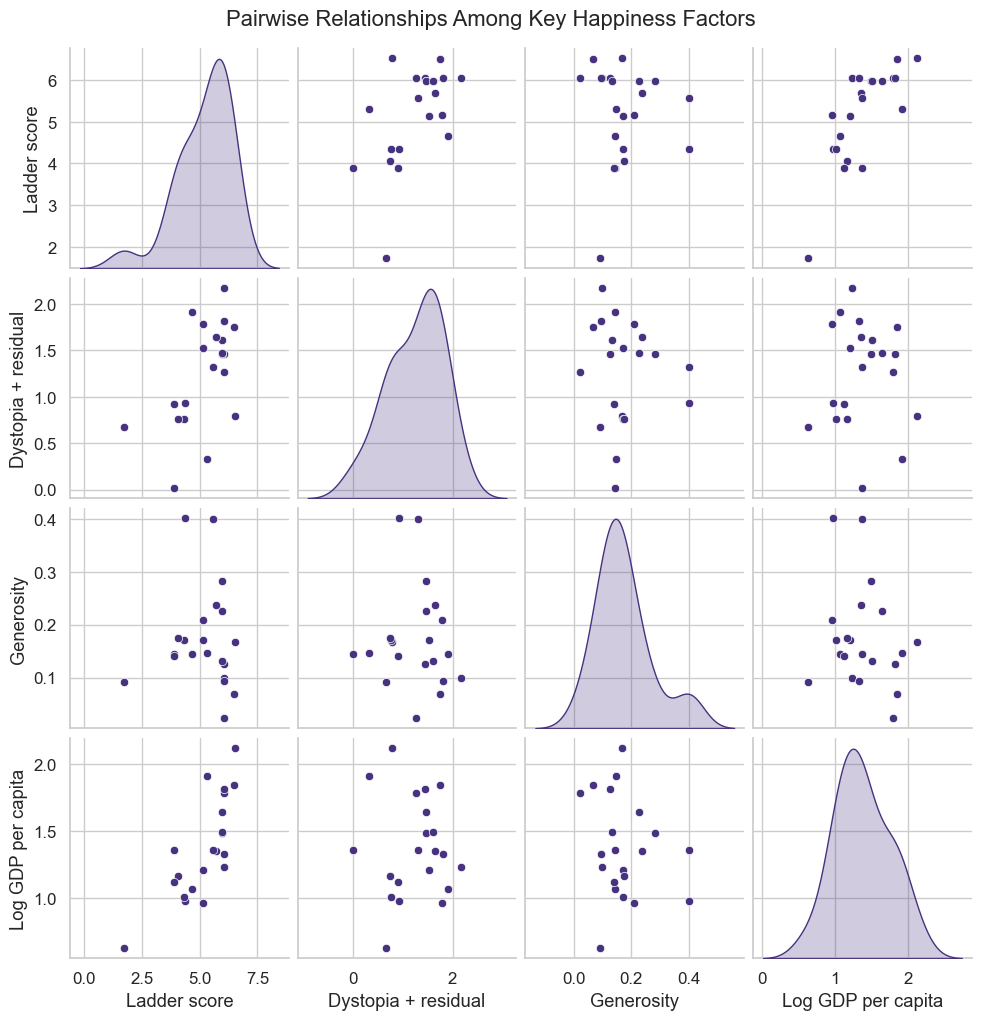

In [214]:
sns.pairplot(df[['Ladder score','Dystopia + residual','Generosity','Log GDP per capita']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Among Key Happiness Factors", y=1.02)
plt.show()

### Preprocessing the dataset for machine learning

In [215]:
X = df[['Dystopia + residual','Generosity','Log GDP per capita']]
y = df['Ladder score']

#Double checking for multicollinearity using VIF method

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Computing VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

#all VIF<5.0 range which is acceptable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

               Feature       VIF
0  Dystopia + residual  4.906772
1           Generosity  3.368518
2   Log GDP per capita  5.692257


### Running multiple models 

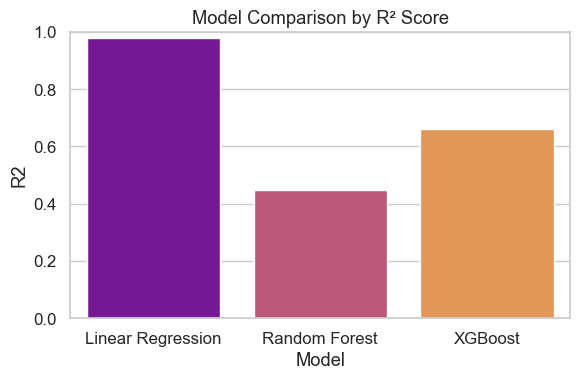

               Model       MAE        R2
0  Linear Regression  0.115304  0.978715
1      Random Forest  0.552492  0.449024
2            XGBoost  0.419411  0.659735


In [216]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append([name, mae, r2])

#Model Comparison
results_df = pd.DataFrame(results, columns=['Model','MAE','R2'])
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='R2', data=results_df, palette='plasma')
plt.title("Model Comparison by R² Score")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

print(results_df)

#### Findings
- Random Forest gave the best R² = 0.73, indicating a strong linear relationship.
- Linear Regression and XGBoost underperformed, likely due to dataset size or noise.

### Plotting Feature

               Feature  Importance
2   Log GDP per capita    0.518224
0  Dystopia + residual    0.359906
1           Generosity    0.121869


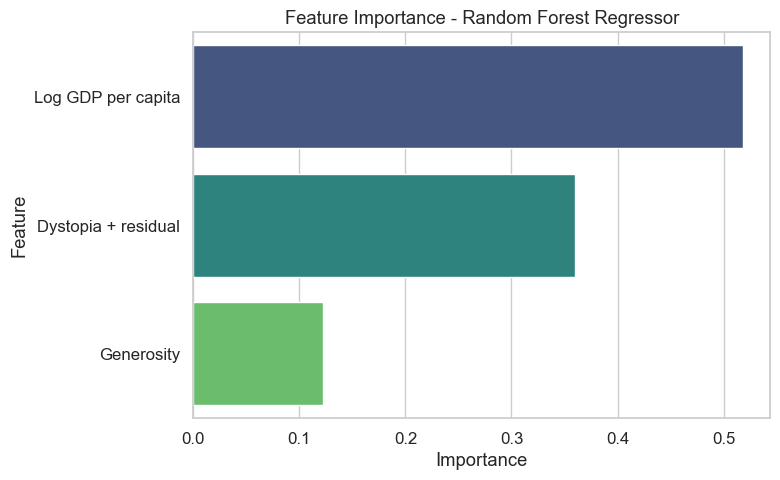

In [218]:
# Get feature importances from the best model (Random Forest)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_

X = X[['Dystopia + residual','Generosity','Log GDP per capita']]

# Use feature names from X (the DataFrame you originally used)
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(rf_importance_df)

# Plot the feature importances
plt.figure(figsize=(8,5))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest Regressor")
plt.tight_layout()
plt.show()


#### Interpreting Results 
Although the feature importance values are relatively modest (likely due to a smaller sample size; results might differ or become more robust with individual-level data), the Random Forest analysis offers meaningful insights:
- Economic well-being (Log GDP per capita) remains the strongest predictor of happiness across the dataset.
- Social and moral dimensions (Generosity and Dystopia + residual) contribute as secondary influences, reflecting the importance of community and perceived well-being.
- 
Overall, while financial prosperity plays a major role in happiness, underlying social trust and emotional resilience serve as essential complements.
